## This is HNA or Hybrid SFLA-CSO Network Aligner program, and implemented by Elham Mahdipour that is Ph.D. Candidate of Artificial Intelligence at Yazd University, Yazd, Iran. 
### All copyright reserved by the author.

You can run the program from first to end and see all the results, but since the population generation process can take a time depended on the node numbers of networks, you can use the populations stored in each program. We saved the populations as the pair of related species that you can see in the input folder and load them on program, such as "ce-sc-pop.pickle". Therefore, you must run follow steps: 1) Run all cells in "Load Graphs", "Swap Graphs", "Define Target Graph",and "Compute Score for create similarity matrix" sections. 2) If you will use saved population, please upload related pickle on root of jupyter notebook, then go "load population" cell and run them; else, please run "multi tasking for initial population", "multi processing for speed up", and "Initialization such as MeAlign" cells. 3) Run all remains cells to create results.

# Load Graphs 

In [1]:
import pickle
with open('hs-hs-weighted.pickle', 'rb') as f:
    hslist = pickle.load(f)

In [2]:
with open('dm-dm-weighted.pickle', 'rb') as f:
    dmlist = pickle.load(f)

In [3]:
import networkx as nx
G1=nx.Graph()
for i in range(len(hslist)):
    if G1.has_node(hslist[i][0])==False:
        G1.add_node(hslist[i][0])
    if G1.has_node(hslist[i][1])==False:
        G1.add_node(hslist[i][1])
    G1.add_edge(hslist[i][0],hslist[i][1],weight=hslist[i][2])
G1

In [4]:
G1.number_of_nodes()

10399

In [5]:
G1.number_of_edges()

142847

In [6]:
len(G1)

10399

In [7]:
G2=nx.Graph()
for i in range(len(dmlist)):
    if G2.has_node(dmlist[i][0])==False:
        G2.add_node(dmlist[i][0])
    if G2.has_node(dmlist[i][1])==False:
        G2.add_node(dmlist[i][1])
    G2.add_edge(dmlist[i][0],dmlist[i][1],weight=dmlist[i][2])
G2

In [8]:
print('len G1:', len(G1))

print('len G2:',len(G2))

len G1: 10399
len G2: 7361


# Swap graphs if len G1 > len G2

In [9]:
### Check and Swap if G1 > G2 ###
if len(G1)>len(G2):
    temp=G1
    G1=G2
    G2=temp
print(len(G1))
print(len(G2))

7361
10399


In [10]:
ed1=G1.edges()

In [11]:
nd1=G1.nodes()

In [12]:
ed2=G2.edges()

In [13]:
len(ed2)

142847

In [14]:
nd2=G2.nodes()

In [15]:
len(ed1)

33691

In [16]:
len(nd1)

7361

In [17]:
el1=list(ed1)
el2=list(ed2)

In [18]:
nd1=list(nd1)
nd2=list(nd2)

In [19]:
degG1 = [val for (node, val) in G1.degree()]


In [20]:
degG2 = [val for (node, val) in G2.degree()]

# Define Target Graph

In [21]:
G_target_na=nx.read_weighted_edgelist('dm-hs.evals')
G_target_na  

In [22]:
gtnode=list(G_target_na.nodes())
print(len(gtnode))
g_t_node=[]
for i in range(len(gtnode)):
    if (G1.has_node(gtnode[i])==False and G2.has_node(gtnode[i])==False):
        continue
    else:
        g_t_node.append(gtnode[i])

#print(gtnode)
print(len(g_t_node))

25376
14491


In [23]:
G_target=nx.Graph()
for i in range(len(g_t_node)):
    for j in range(len(g_t_node)):
        if G_target_na.has_node(g_t_node[i])==False:
            G_target.add_node(g_t_node[i])
        if G_target_na.has_node(g_t_node[j])==False:
            G_target.add_node(g_t_node[j])
        if G_target_na.has_edge(g_t_node[i],g_t_node[j]):
            a=list(G_target_na.get_edge_data(g_t_node[i],g_t_node[j]).values())
            #b=list(a[0][0].values())
            G_target.add_edge(g_t_node[i],g_t_node[j],weight=a[0])
G_target

In [24]:
len(G_target)

13217

In [25]:
G_target_na=G_target

In [26]:
G_target_na.edges()

EdgeView([('hs7190', 'dm5534'), ('hs7190', 'dm5043'), ('hs7190', 'dm4448'), ('hs7190', 'dm5013'), ('hs7190', 'dm3600'), ('hs7190', 'dm4844'), ('hs7190', 'dm4945'), ('hs7190', 'dm4743'), ('hs7190', 'dm4871'), ('hs7190', 'dm4819'), ('hs7190', 'dm5434'), ('dm4977', 'hs9621'), ('dm4977', 'hs5702'), ('dm4977', 'hs7164'), ('hs9621', 'dm5271'), ('hs9621', 'dm6415'), ('hs5702', 'dm5271'), ('hs5702', 'dm6415'), ('hs7164', 'dm5271'), ('hs7164', 'dm6415'), ('dm4976', 'hs6551'), ('dm4976', 'hs7091'), ('dm4976', 'hs8722'), ('hs6551', 'dm5371'), ('hs6551', 'dm5303'), ('hs6551', 'dm5627'), ('hs6551', 'dm4445'), ('hs6551', 'dm5576'), ('hs6551', 'dm4918'), ('hs6551', 'dm4912'), ('hs6551', 'dm5867'), ('hs6551', 'dm5759'), ('hs6551', 'dm5377'), ('hs6551', 'dm6316'), ('hs6551', 'dm5469'), ('hs7091', 'dm4357'), ('hs7091', 'dm5627'), ('hs7091', 'dm5377'), ('hs8722', 'dm5371'), ('hs8722', 'dm5303'), ('hs8722', 'dm5627'), ('hs8722', 'dm4445'), ('hs8722', 'dm5576'), ('hs8722', 'dm4918'), ('hs8722', 'dm4912'), 

# Compute Score for create similarity matrix 

In [27]:
def deg_Diff(G1,G2):
    Degree_Difference=np.zeros((len(G1),len(G2)))
    for i in range(len(G1)):
        for j in range(len(G2)):
            Degree_Difference[i][j]=abs(degG1[i]-degG2[j])/max(degG1[i],degG2[j])
    return Degree_Difference

In [28]:
def score_pageRank(X):
    a=nx.pagerank(X)
    return a

In [29]:
def coefficient_pagerank(x,y):  #x is G1, y is G2
   # print(len(x))
    p1=score_pageRank(x)
    b=p1.values()
    pr1=list(b)
    p2=score_pageRank(y)
    c=p2.values()
    pr2=list(c)
    pr=np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            #print(pr1[i],pr2[j])
            pr[i][j]=abs(pr1[i]-pr2[j])/max(pr1[i],pr2[j])   #minimum pr is maximum similarity of topology 
    return pr

In [30]:
def coefficient_edges(index_node, G, GraphNumber):
    if GraphNumber==1:
        sum_edge=0        
        for i in G.neighbors(nd1[index_node]):                       
            sum_edge=sum_edge+degG1[nd1.index(i)]
        #print(sum_edge)
        temp=(degG1[index_node]-1) if degG1[index_node]> 1 else 1        
        coeff_node=(2*sum_edge)/(degG1[index_node]*temp)
    else:
        sum_edge=0        
        for i in G.neighbors(nd2[index_node]):                       
            sum_edge=sum_edge+degG2[nd2.index(i)]
        #print(sum_edge)
        temp=(degG2[index_node]-1) if degG2[index_node]> 1 else 1        
        coeff_node=(2*sum_edge)/(degG2[index_node]*temp)
    return coeff_node
    

In [31]:
def compute_Ea(G1,G2):
    Ea_G1=np.zeros(len(G1))
    Ea_G2=np.zeros(len(G2))
    for i in range(len(G1)):
        Ea_G1[i]=coefficient_edges(i, G1, 1)
    for j in range(len(G2)):
        Ea_G2[j]=coefficient_edges(j,G2,2)
    ea=[Ea_G1, Ea_G2]
    return(ea)

In [32]:
# compute relative clustering coefficient difference between node a (in G1) and node b (in G2)
def CD(G1, G2):
    cd=np.zeros((len(G1),len(G2)))
    EA=compute_Ea(G1,G2)
    #print(EA[0])      #Ea for G1
    #print("===================")
    #print(EA[1])      #Ea for G2
    for i in range(len(G1)):
        for j in range(len(G2)):
            cd[i,j]=abs(EA[0][i]-EA[1][j])/max(EA[0][i],EA[1][j])
    return cd

In [33]:
def sequence_score(x,y):
    seq=np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            q1=G_target_na.get_edge_data(str(nd1[i]),str(nd2[j]))
            if q1==None:
                c=0
            else:
                c=list(q1.values())
                c=c[0]
            seq[i][j]=c    
            
    return seq

In [34]:
def compute_score(G1,G2):
    coeff_pr=coefficient_pagerank(G1,G2)
    dd=deg_Diff(G1,G2)
    cd=CD(G1,G2)
    seq_sc=sequence_score(G1,G2)
    
    alpha=0.1
    betta=0.2
    gamma=0.2
    zetta=1-alpha-betta-gamma
    s=alpha*(1-coeff_pr)+betta*(1-dd)+gamma*(1-cd)+zetta*seq_sc
    return s

In [35]:
import numpy as np
m=compute_score(G1,G2)
n=m


# multi tasking for initial population

In [36]:
def task1(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation):
    print('task1')
    for z1 in range(int(len_G1/3)):
        for z2 in range(len_G1):
            similarity_score_matrix[z1][z2]=m[z1][int(rand_permutation[z1][z2])]
        index_score=np.argmax(similarity_score_matrix,axis=1)               
        pop[i][z1][0]=nd1.index(nd1[z1])
        pop[i][z1][1]=nd2.index(nd2[int(rand_permutation[z1][index_score[z1]])])
  

In [37]:
def task2(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation):
    print('task2')
    for z1 in range(int(len_G1/3),int(2*len_G1/3)):
        for z2 in range(len_G1):
            similarity_score_matrix[z1][z2]=m[z1][int(rand_permutation[z1][z2])]
        index_score=np.argmax(similarity_score_matrix,axis=1)               
        pop[i][z1][0]=nd1.index(nd1[z1])
        pop[i][z1][1]=nd2.index(nd2[int(rand_permutation[z1][index_score[z1]])])
    

In [38]:
def task3(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation):
    print('task3')
    for z1 in range(int(2*len_G1/3),len_G1):
        for z2 in range(len_G1):
            similarity_score_matrix[z1][z2]=m[z1][int(rand_permutation[z1][z2])]
        index_score=np.argmax(similarity_score_matrix,axis=1)               
        pop[i][z1][0]=nd1.index(nd1[z1])
        pop[i][z1][1]=nd2.index(nd2[int(rand_permutation[z1][index_score[z1]])])
    

# multi processing for speed up

In [39]:
def fun_rand_permute(len_G1, base_permute, rand_permutation):
    for k in range(len_G1):
        rand_permutation[k]=random.sample(base_permute,len_G1)
    #print(rand_permutation)

# Initial other method

In [36]:
#import threading
import random

len_G1=len(G1)
len_G2=len(G2)
simmat=m
len_pop=300
npop=np.zeros((len_pop,len_G1,2))
#rand_permutation=np.zeros((len_G1,len_G1))
base_permute = [j for  j in range(0, len_G2)]
print('wait')
"""t = threading.Thread(target=fun_rand_permute, args=(len_G1,base_permute, rand_permutation,))
t.start() 
t.join()
#print(rand_permutation)
    

    print('for loop')
    if i>0:
        do_not_permute = set(base_permute)-set(ind)#[item for item in base_permute if item not in index_score]
        #print(do_not_permute)
        #print(len(base_permute))
        base_permute.extend(do_not_permute)
        #print(len(do_not_permute))
        #print(len(base_permute))
        #print(base_permute)
     """
    
for i in range(len_pop): 
    ind=np.argmax(simmat,axis=1)
    for j in range(len_G1):
        npop[i][j][0]=nd1.index(nd1[j])
        #if (ind[j]<len_G1):
         #   npop[i][j][1]=nd2.index(nd2[int(rand_permutation[j][ind[j]])])
        #else:
        npop[i][j][1]=nd2.index(nd2[ind[j]])
        simmat[j,ind[j]]=0
    print('Done i=',i)
npop

wait
Done i= 0
Done i= 1
Done i= 2
Done i= 3
Done i= 4
Done i= 5
Done i= 6
Done i= 7
Done i= 8
Done i= 9
Done i= 10
Done i= 11
Done i= 12
Done i= 13
Done i= 14
Done i= 15
Done i= 16
Done i= 17
Done i= 18
Done i= 19
Done i= 20
Done i= 21
Done i= 22
Done i= 23
Done i= 24
Done i= 25
Done i= 26
Done i= 27
Done i= 28
Done i= 29
Done i= 30
Done i= 31
Done i= 32
Done i= 33
Done i= 34
Done i= 35
Done i= 36
Done i= 37
Done i= 38
Done i= 39
Done i= 40
Done i= 41
Done i= 42
Done i= 43
Done i= 44
Done i= 45
Done i= 46
Done i= 47
Done i= 48
Done i= 49
Done i= 50
Done i= 51
Done i= 52
Done i= 53
Done i= 54
Done i= 55
Done i= 56
Done i= 57
Done i= 58
Done i= 59
Done i= 60
Done i= 61
Done i= 62
Done i= 63
Done i= 64
Done i= 65
Done i= 66
Done i= 67
Done i= 68
Done i= 69
Done i= 70
Done i= 71
Done i= 72
Done i= 73
Done i= 74
Done i= 75
Done i= 76
Done i= 77
Done i= 78
Done i= 79
Done i= 80
Done i= 81
Done i= 82
Done i= 83
Done i= 84
Done i= 85
Done i= 86
Done i= 87
Done i= 88
Done i= 89
Done i= 90
Done

array([[[0.0000e+00, 1.4200e+02],
        [1.0000e+00, 7.0900e+02],
        [2.0000e+00, 7.0400e+02],
        ...,
        [7.3580e+03, 1.0203e+04],
        [7.3590e+03, 8.0000e+00],
        [7.3600e+03, 8.0000e+00]],

       [[0.0000e+00, 2.1600e+02],
        [1.0000e+00, 6.8500e+02],
        [2.0000e+00, 7.3400e+02],
        ...,
        [7.3580e+03, 8.0000e+00],
        [7.3590e+03, 1.8000e+01],
        [7.3600e+03, 1.8000e+01]],

       [[0.0000e+00, 2.5900e+02],
        [1.0000e+00, 7.2200e+02],
        [2.0000e+00, 6.8300e+02],
        ...,
        [7.3580e+03, 1.8000e+01],
        [7.3590e+03, 1.9000e+01],
        [7.3600e+03, 1.9000e+01]],

       ...,

       [[0.0000e+00, 1.8540e+03],
        [1.0000e+00, 2.9740e+03],
        [2.0000e+00, 2.6180e+03],
        ...,
        [7.3580e+03, 5.8920e+03],
        [7.3590e+03, 5.9000e+03],
        [7.3600e+03, 5.9000e+03]],

       [[0.0000e+00, 1.5300e+03],
        [1.0000e+00, 2.9870e+03],
        [2.0000e+00, 1.0700e+03],
        .

In [37]:
pop=npop

# Initialization such as MeAlign

In [ ]:
#%%prun
import random
import threading

len_pop=300 
len_G1=len(G1)
len_G2=len(G2)
similarity_score_matrix=np.zeros((len_G1,len_G1))
sim_score_matrix=np.zeros((len_G1,len_G1))
pop=np.zeros((len_pop,len_G1,2))
index_score=np.zeros(len_G1)
rand_permutation=np.zeros((len_G1,len_G1))
base_permute = [j for  j in range(0, len_G2)]

for i in range(len_pop):  
    print('wait')
    if i>0:
        do_not_permute = set(base_permute)-set(index_score)#[item for item in base_permute if item not in index_score]
        #print(do_not_permute)
        #print(len(base_permute))
        base_permute.extend(do_not_permute)
        #print(len(do_not_permute))
        #print(len(base_permute))
        #print(base_permute)
     
    t = threading.Thread(target=fun_rand_permute, args=(len_G1,base_permute, rand_permutation,))
    t.start() 
    t.join()
    #print(rand_permutation)
    
    """for k in range(len_G1):
        rand_permutation[k]=random.sample(base_permute,len_G1)"""               
    print('in for loop')
    """for z1 in range(len_G1):
        for z2 in range(len_G1):
            similarity_score_matrix[z1][z2]=m[z1][int(rand_permutation[z1][z2])]
        index_score=np.argmax(similarity_score_matrix,axis=1)               
        pop[i][z1][0]=nd1.index(nd1[z1])
        pop[i][z1][1]=nd2.index(nd2[int(rand_permutation[z1][index_score[z1]])])"""
     
    
      
    t1 = threading.Thread(target=task1, args=(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation,)) 
    t2 = threading.Thread(target=task2, args=(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation,))
    t3 = threading.Thread(target=task3, args=(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation,))
    # starting thread 1 
    t1.start() 
    # starting thread 2 
    t2.start() 
    # starting thread 3 
    t3.start() 
    # wait until thread 1 is completely executed 
    t1.join() 
    # wait until thread 2 is completely executed 
    t2.join() 
    # wait until thread 3 is completely executed 
    t3.join()
    # both threads completely executed 
    print("Done!, i=",i) 
    
pop

wait
in for loop
task1
task2
task3
Done!, i= 0
wait
in for loop
task1
task2
task3
Done!, i= 1
wait
in for loop
task1
task2
task3
Done!, i= 2
wait
in for loop
task1
task2
task3
Done!, i= 3
wait
in for loop
task1
task2
task3
Done!, i= 4
wait
in for loop
task1
task2
task3
Done!, i= 5
wait
in for loop
task1
task2
task3
Done!, i= 6
wait
in for loop
task1
task2
task3
Done!, i= 7
wait
in for loop
task1
task2task3

Done!, i= 8
wait
in for loop
task1
task2
task3
Done!, i= 9
wait
in for loop
task1
task2
task3
Done!, i= 10
wait
in for loop
task1
task2
task3
Done!, i= 11
wait
in for loop
task1
task2
task3
Done!, i= 12
wait
in for loop
task1
task2
task3


# Save population

In [42]:
import pickle
with open('dm-hs-base_permute.pickle', 'wb') as f:
    pickle.dump(base_permute, f)

In [43]:
import pickle
with open('dm-hs-pop.pickle', 'wb') as f:
    pickle.dump(pop, f)

## You can load population if there is save population such as 'dm-hs-pop.pickle'

# Load population

In [ ]:
with open('dm-hs-base_permute', 'rb') as f:
    base_permute = pickle.load(f)

In [ ]:
with open('dm-hs-pop.pickle', 'rb') as f:
    pop = pickle.load(f)

# compute measure edge correctness, ics, nc and s3

In [38]:
def induced_function_for_initialpop(sub_pop):
    num_induced=0
    sub_g2=list(set([sub_pop[i][1] for i in range(len(G1))]))
    for i in range(len(sub_g2)):
        for j in range(i,len(sub_g2)):
            if G2.has_edge(nd2[int(sub_g2[i])], nd2[int(sub_g2[j])]):
                num_induced=num_induced+1
    return num_induced

In [39]:
score_ec=np.zeros(len_pop)
score_ics=np.zeros(len_pop)
score_s3=np.zeros(len_pop)
score_nc=np.zeros(len_pop)
num_seq=np.zeros(len_pop)
score_ncorectness=np.zeros(len_pop)

p=pop 
len_G1=len(G1)
map_items=[] #np.zeros((len_pop,len_G1,2))

for i in range(len(p)):
    ec=0
    nc=0
    sub_pop=p[i]
    sub_g2=list(set([sub_pop[i][1] for i in range(len(G1))]))
    num_induced=induced_function_for_initialpop(sub_pop) 
    #print("number induced for i=",i," is: ",num_induced)
    
    for j in range(len_G1):                           
         if G_target_na.has_edge(nd1[int(p[i][j][0])],nd2[int(p[i][j][1])]):
            num_seq[i]+=1  # create sequence matrix 
            map_items.append([nd1[int(p[i][j][0])],nd2[int(p[i][j][1])]])
            ec=ec+1            
            nc=nc+2
                 
    score_ec[i]=ec/G1.number_of_edges()*100
    score_ics[i]=ec/num_induced*100
    score_s3[i]=ec/(G1.number_of_edges()+num_induced-ec)*100
    score_nc[i]=nc/G1.number_of_nodes()*100 
    score_ncorectness[i]=(nc/G_target_na.number_of_nodes())*100
    """if (score_nc[i] > 100):
        score_nc[i]=100
    if (score_ec[i] > 100):
        score_ec[i]=100
    if (score_ics[i] > 100):
        score_ics[i]=100
    if (score_s3[i] > 100):
        score_s3[i]=100
    if ( score_ncorectness[i]>100):
         score_ncorectness[i]=100"""

print('ec')
print(score_ec)
print('ics')
print(score_ics)
print('s3')
print(score_s3)
print('nc',score_nc)
print('node correctness: ',  score_ncorectness)

ec
[15.42548455 11.38583004  9.50699     8.34347452  7.58659583  6.99593363
  6.50025229  6.06096584  5.7493099   5.46733549  5.24472411  5.01320828
  4.74607462  4.56798552  4.44925945  4.31866077  4.15244427  4.05746342
  3.9357692   3.83782019  3.775489    3.70722151  3.56771838  3.44602416
  3.31542548  3.21450833  3.15217714  3.09875041  3.01267401  2.95034282
  2.87317088  2.81380784  2.76038111  2.71882699  2.6624321   2.63275059
  2.62087798  2.59713277  2.56745125  2.53776973  2.50808821  2.46356594
  2.45466148  2.43685257  2.36858508  2.33593541  2.29734944  2.27657238
  2.24095456  2.19643228  2.14894185  2.10145143  2.03318394  1.95601199
  1.90852156  1.87587189  1.83728592  1.78979549  1.73043246  1.67403758
  1.61764269  1.58796118  1.56124781  1.51969369  1.47517141  1.4514262
  1.43064913  1.40987207  1.39503131  1.36238164  1.32379567  1.30895491
  1.27630524  1.24959188  1.22881482  1.20803775  1.18429254  1.16945178
  1.13977027  1.11008875  1.08040723  1.05072571 

## number of matched sequences 

In [40]:
num_seq

array([5197., 3836., 3203., 2811., 2556., 2357., 2190., 2042., 1937.,
       1842., 1767., 1689., 1599., 1539., 1499., 1455., 1399., 1367.,
       1326., 1293., 1272., 1249., 1202., 1161., 1117., 1083., 1062.,
       1044., 1015.,  994.,  968.,  948.,  930.,  916.,  897.,  887.,
        883.,  875.,  865.,  855.,  845.,  830.,  827.,  821.,  798.,
        787.,  774.,  767.,  755.,  740.,  724.,  708.,  685.,  659.,
        643.,  632.,  619.,  603.,  583.,  564.,  545.,  535.,  526.,
        512.,  497.,  489.,  482.,  475.,  470.,  459.,  446.,  441.,
        430.,  421.,  414.,  407.,  399.,  394.,  384.,  374.,  364.,
        354.,  346.,  338.,  329.,  319.,  313.,  305.,  295.,  288.,
        284.,  278.,  270.,  265.,  258.,  257.,  254.,  251.,  245.,
        243.,  239.,  236.,  233.,  229.,  226.,  219.,  217.,  216.,
        212.,  210.,  208.,  206.,  202.,  201.,  199.,  197.,  194.,
        192.,  191.,  189.,  188.,  187.,  184.,  183.,  181.,  180.,
        174.,  169.,

## compute topology score

In [41]:
#compute Final Score
tscore=np.zeros(len_pop)
for i in range(len(p)):
    tscore[i]=(0.25*(score_ec[i]/G1.number_of_edges())+0.25*(score_s3[i]/(G1.number_of_edges()+score_ics[i]-score_ec[i]))+0.25*(score_ics[i]/2*G1.number_of_edges())+0.25*(score_nc[i]/(G1.number_of_nodes()+G2.number_of_nodes())))
print(tscore)

[83869.23835838 76029.90795143 73111.29741459 63776.39987007
 57940.97695747 54856.09866767 54332.32050698 49357.90563787
 44225.71713091 43634.56455931 44103.00331968 41557.67992697
 38794.72716576 35832.07785112 35300.85129677 38335.5275441
 36763.47010564 35338.22183093 33293.28887689 33037.9078051
 33295.22708627 33558.8073064  31375.18799679 30450.31109953
 29417.20936763 29499.50970386 29231.89750483 28047.17765189
 27292.46387269 26480.93886615 25123.94346058 24337.86616221
 25719.587664   25219.79314093 24603.38304566 25475.61671991
 24151.7450288  24729.56969174 23177.70205554 23953.73655521
 24736.63232365 23589.15711744 21965.2319629  23607.39400188
 21829.66743475 22341.4369669  21697.42593911 21750.21663755
 21441.68974324 20976.0890232  20925.36918755 20176.29952596
 20818.30060545 19327.92091898 19073.84773796 18693.55975424
 18446.37108519 18189.66521295 17841.9566799  17675.36487471
 17774.33132967 18472.45759172 18430.67873043 18217.5061297
 16940.94213547 17309.93023

# Compute Topology and Sequence score

In [42]:
# Final Score
score=np.zeros(len_pop)
alpha=0.5
for i in range (len(p)):
    score[i]=alpha*tscore[i]+(1-alpha)*num_seq[i]   
score

array([44533.11917919, 39932.95397572, 38157.1487073 , 33293.69993504,
       30248.48847874, 28606.54933384, 28261.16025349, 25699.95281894,
       23081.35856545, 22738.28227965, 22935.00165984, 21623.33996348,
       20196.86358288, 18685.53892556, 18399.92564839, 19895.26377205,
       19081.23505282, 18352.61091547, 17309.64443844, 17165.45390255,
       17283.61354313, 17403.9036532 , 16288.59399839, 15805.65554977,
       15267.10468382, 15291.25485193, 15146.94875242, 14545.58882595,
       14153.73193635, 13737.46943308, 13045.97173029, 12642.93308111,
       13324.793832  , 13067.89657046, 12750.19152283, 13181.30835996,
       12517.3725144 , 12802.28484587, 12021.35102777, 12404.3682776 ,
       12790.81616182, 12209.57855872, 11396.11598145, 12214.19700094,
       11313.83371738, 11564.21848345, 11235.71296956, 11258.60831878,
       11098.34487162, 10858.0445116 , 10824.68459377, 10442.14976298,
       10751.65030272,  9993.46045949,  9858.42386898,  9662.77987712,
      

## Define function for fitness and compute final score

In [43]:
def induced_function_for_pop(wpop):
    counter_induced=0
    subg=list(set([wpop[i][1] for i in range(len_G1)]))
    for i in range(len(subg)):
        for j in range(i,len(subg)):
            if G2.has_edge(nd2[int(subg[i])], nd2[int(subg[j])]):
                counter_induced=counter_induced+1
    #print("con: ",counter_induced)
    return counter_induced

In [44]:
def Fitness(wpop,counter_induced):
    ec_temp=0
    nc_temp=0
    num_seq_temp=0
    score_ncorectness=0
    
  
    for j in range(len_G1):        
        x1=int(wpop[j][0])
        x2=int(wpop[j][1])
        if G_target_na.has_edge(nd1[x1],nd2[x2]):
            num_seq_temp+=1              
            ec_temp=ec_temp+1            
            nc_temp=nc_temp+2
                 
    score_ec_temp=ec_temp/G1.number_of_edges()*100
    score_ics_temp=ec_temp/counter_induced*100
    score_s3_temp=ec_temp/(G1.number_of_edges()+counter_induced-ec_temp)*100
    score_nc_temp=nc_temp/G1.number_of_nodes()*100
    score_ncorectness=(nc_temp/G_target_na.number_of_nodes())*100
    """if (score_nc_temp > 100):
        score_nc_temp=100
    if (score_ec_temp > 100):
        score_ec_temp=100
    if (score_ics_temp > 100):
        score_ics_temp=100
    if (score_s3_temp > 100):
        score_s3_temp=100
    if ( score_ncorectness>100):
         score_ncorectness=100"""
    # local measures
    pre=ec_temp/G_target_na.number_of_edges()*100
    rec=ec_temp/len(wpop)*100
    fsc=2*((pre*rec)/(pre+rec))
    
    if (GbestFlag==True):
        print('ec')
        print(score_ec_temp)
        print('ics')
        print(score_ics_temp)
        print('s3')
        print(score_s3_temp)
        print('nc',score_nc_temp)
        print('num_seq',num_seq_temp)
        print('precision: ',pre)
        print('Recall: ',rec)
        print('F-score: ',fsc)

    alpha=0.5
    tscore_temp=(0.25*(score_ec_temp/G1.number_of_edges())+0.25*(score_s3_temp/(G1.number_of_edges()+score_ics_temp-score_ec_temp))+0.25*(score_ics_temp/2*G1.number_of_edges())+0.25*(score_nc_temp/(G1.number_of_nodes()+G2.number_of_nodes())))
    score_temp=alpha*tscore_temp+(1-alpha)*num_seq_temp
    print('score:',score_temp)
    
    return score_temp,pre,rec,fsc


# HNA: Hybrid SFLA-CSO proposed method

In [45]:
# Implementation of Hybrid SFLA-CSO Algorithm
import random
from operator import itemgetter
from random import shuffle
import concurrent.futures

precision=np.zeros(len_pop)
recall=np.zeros(len_pop)
fscore=np.zeros(len_pop)

dim=len_G1
new_pop=p.tolist()
[new_pop[i].append(score[i]) for i in range(len_pop)]
#[print(new_pop[i][dim]) for i in range(len_pop)]

new_pop=sorted(new_pop, key=itemgetter(dim),reverse=True)
counter_induced=num_induced #0

GBestFrog=new_pop[0]
#print("GBest: ",GBestFrog)

index=0
iteration=2
epoch=0
memeplex=100

group=int(len_pop/memeplex)
len_G1=len(G1)
dim=len_G1
GbestFlag=False
max_score=max(score)
while (epoch<1):
    k=u=0
    #==== Set memeplexes =====
    memp=[]
    memp.append([new_pop[0],new_pop[memeplex],new_pop[2*memeplex]])#,new_pop[3*memeplex],new_pop[4*memeplex]])
    for i in range(1,memeplex):    
        memp.append([new_pop[i],new_pop[i+memeplex],new_pop[i+2*memeplex]])#,new_pop[i+3*memeplex],new_pop[i+4*memeplex]])
    #print('Check memeplex')
    #[[print(memp[i][j][dim]) for j in range(group)]for i in range(memeplex)]
    #=== Local Search =====   
    while(k<memeplex):
        u=0
        print("k ",k)
        print("epoch ",epoch)
        while(u<iteration):
            print("u ",u)
            memp[k]=sorted(memp[k], key=itemgetter(dim),reverse=True)
            #print('Check sort memeplex')
            #[[print(memp[i][j][dim]) for j in range(group)]for i in range(memeplex)]
            #=== set best frog and worst frog 
            bestFrog=memp[k][0]
            worstFrog=memp[k][group-1]            
            #print("BestFrog",bestFrog[dim])
            #print("WorstFrog",worstFrog[dim])
            r1=random.random()
            c1=2
            TeV=(worstFrog[dim]+r1*c1*(bestFrog[dim]-worstFrog[dim]))/100             #number of permutation
           # print(TeV)
                       
            # move 1
            temp_worst=worstFrog    #temp_worst is TeX
            Flag_move1=False
            # counter induced for ics compute            
            """with concurrent.futures.ThreadPoolExecutor() as executor:
                future = executor.submit(induced_function_for_pop, temp_worst)
                counter_induced = future.result()
                #print("counter induced: ",counter_induced)"""
            
            for i in range(int(TeV)):
                #Flag_move1=False
                rand_index1=random.randint(0,dim-1)
                rand_permute=random.sample(base_permute,len_G1)                
                #print('rand1',rand_index1)                                
                if not(G_target_na.has_edge(temp_worst[rand_index1][0],temp_worst[rand_index1][1])):                                                 
                        temp_score=np.argmax(m[rand_index1])
                        #print(nd2[temp_score])                        
                        #print('temp:',G_target_na.has_edge(nd1[int(temp_worst[rand_index1][0])],nd2[temp_score]))
                        if(G_target_na.has_edge(nd1[int(temp_worst[rand_index1][0])],nd2[temp_score])):                                
                                temp_worst[rand_index1][1]=temp_score
                                Fit_New,pre,rec,fsc=Fitness(temp_worst,counter_induced)     
                                if(Fit_New>worstFrog[dim]):
                                    print('w',worstFrog[dim])
                                    print('new',Fit_New)
                                    temp_worst[dim]=Fit_New
                                    memp[k][group-1]=temp_worst 
                                    Flag_move1=True
                                    print('move1 ', TeV)                                                                 
            #======== move 2 =======
            Flag_move2=False
            
            if(Flag_move1==False):
                    TeV=(worstFrog[dim]+r1*c1*(GBestFrog[dim]-worstFrog[dim]))/100   #number of random permutation                
                            #print(TeV)                
           
                    temp_worst=worstFrog    #temp_worst is TeX               
                
                    for i in range(int(TeV)):
                        #Flag_move2=False
                        rand_permute=random.sample(base_permute,len_G1)
                        rand_index1=random.randint(0,dim-1)
                        if not(G_target_na.has_edge(temp_worst[rand_index1][0],temp_worst[rand_index1][1])):                            
                            temp_score=np.argmax(m[rand_index1])
                            #print(nd2[temp_score])
                            #print('temp:',G_target_na.has_edge(nd1[int(temp_worst[rand_index1][0])],nd2[temp_score]))
                            if(G_target_na.has_edge(temp_worst[rand_index1][0],nd2[temp_score])):                                
                                temp_worst[rand_index1][1]=temp_score                                                                   
                                Fit_New,pre,rec,fsc=Fitness(temp_worst,counter_induced)     
                                if(Fit_New>worstFrog[dim]):
                                    print('w',worstFrog[dim])
                                    print('new',Fit_New)
                                    temp_worst[dim]=Fit_New
                                    memp[k][group-1]=temp_worst 
                                    Flag_move2=True
                                    print('move2 ', TeV)                                                                      
                    #===== move 3 =====
            
            if(Flag_move1==False and Flag_move2==False):
                TeV=(worstFrog[dim]*random.random()*2)/100             #number of permutation
                                            # print(TeV)
                              
                temp_worst=worstFrog   #temp_worst is TeX                    
                for i in range(int(TeV)):
                    rand_permute=random.sample(base_permute,len_G1)
                    rand_index1=random.randint(0,dim-1) 
                    if not(G_target_na.has_edge(temp_worst[rand_index1][0],temp_worst[rand_index1][1])):                        
                        temp_score=np.argmax(m[rand_index1])
                        #print(nd2[temp_score])
                        #print('temp:',G_target_na.has_edge(nd1[int(temp_worst[rand_index1][0])],nd2[temp_score]))
                        if (G_target_na.has_edge(temp_worst[rand_index1][0],nd2[temp_score])):                                                    
                            temp_worst[rand_index1][1]=temp_score                            
                            Fit_New,pre,rec,fsc=Fitness(temp_worst,counter_induced)     
                            if(Fit_New>worstFrog[dim]):
                                print('w',worstFrog[dim])
                                print('new',Fit_New)
                                temp_worst[dim]=Fit_New
                                memp[k][group-1]=temp_worst  
                                print('move3 ',TeV)
                
            u=u+1
        k=k+1    
    epoch+=1
    #==== combine memeplexes and create new pop ====
    print('*********** fitness **************')    
    new_pop=[]
    for i in range(memeplex):
        for j in range(group):        
            del memp[i][j][dim]
       
    [[new_pop.append(memp[i][j]) for j in range(group)] for i in range(memeplex)]         
    
    for i in range(len_pop):
        Fit,pre,rec,fsc=Fitness(new_pop[i],counter_induced)
        print('Fit pop',Fit)
        new_pop[i].append(Fit)
        score[i]=Fit
        precision[i]=pre
        recall[i]=rec
        fscore[i]=fsc
    
    new_pop=sorted(new_pop, key=itemgetter(dim), reverse=True)
    print('********** new population ************')
    [print('Fitness: ',new_pop[i][dim]) for i in range(len_pop)]
    
    GBestFrog=new_pop[0]
    
#print("GBest: ",GBestFrog)    
print("epoch: ",epoch)
print("score:", score)
#********** print Local Measures *********
print("Precision: ",precision)
print("Recall: ", recall)
print("F-measure: ",fscore)
#******** map items **********
map_items=[]
weight=[]
for i in range(len_pop):
    for j in range(len_G1):
        if G_target_na.has_edge(nd1[int(new_pop[i][j][0])],nd2[int(new_pop[i][j][1])]):
            map_items.append([nd1[int(new_pop[i][j][0])],nd2[int(new_pop[i][j][1])]]) 
            weight.append(G_target_na.get_edge_data(nd1[int(new_pop[i][j][0])],nd2[int(new_pop[i][j][1])])) 

print("end")

k  0
epoch  0
u  0
score: 1220.7149523276507
u  1
k  1
epoch  0
u  0
u  1
score: 1196.7793650270985
k  2
epoch  0
u  0
u  1
score: 1244.6505396282037
w 1243.7018570546625
new 1244.6505396282037
move1  726.3089032238812
k  3
epoch  0
u  0
u  1
k  4
epoch  0
u  0
u  1
k  5
epoch  0
u  0
u  1
k  6
epoch  0
u  0
u  1
k  7
epoch  0
u  0
score: 1077.1014285243434
u  1
k  8
epoch  0
u  0
u  1
score: 1101.0370158248936
k  9
epoch  0
u  0
u  1
score: 1053.1658412237932
score: 1053.1658412237932
k  10
epoch  0
u  0
u  1
k  11
epoch  0
u  0
score: 1029.2302539232442
u  1
k  12
epoch  0
u  0
u  1
k  13
epoch  0
u  0
u  1
score: 1005.2946666226949
k  14
epoch  0
u  0
u  1
k  15
epoch  0
u  0
score: 981.3590793221462
u  1
k  16
epoch  0
u  0
u  1
k  17
epoch  0
u  0
score: 1029.2302539232442
u  1
k  18
epoch  0
u  0
score: 1005.2946666226949
u  1
k  19
epoch  0
u  0
u  1
k  20
epoch  0
u  0
u  1
k  21
epoch  0
u  0
u  1
k  22
epoch  0
u  0
u  1
k  23
epoch  0
u  0
u  1
k  24
epoch  0
u  0
score: 885

score: 3542.46692048315
Fit pop 3542.46692048315
score: 694.1320317155942
Fit pop 694.1320317155942
score: 20464.92714210515
Fit pop 20464.92714210515
score: 3518.531333182558
Fit pop 3518.531333182558
score: 694.1320317155942
Fit pop 694.1320317155942
score: 19651.11717387523
Fit pop 19651.11717387523
score: 3374.917809379017
Fit pop 3374.917809379017
score: 694.1320317155942
Fit pop 694.1320317155942
score: 19866.5374595831
Fit pop 19866.5374595831
score: 2896.2060633673177
Fit pop 2896.2060633673177
score: 694.1320317155942
Fit pop 694.1320317155942
score: 20704.283015114048
Fit pop 20704.283015114048
score: 3063.7551744713937
Fit pop 3063.7551744713937
score: 694.1320317155942
Fit pop 694.1320317155942
score: 18837.307205645808
Fit pop 18837.307205645808
score: 3039.8195871708103
Fit pop 3039.8195871708103
score: 670.1964444150508
Fit pop 670.1964444150508
score: 19794.730697680476
Fit pop 19794.730697680476
score: 3207.368698274903
Fit pop 3207.368698274903
score: 646.260857114507

score: 6654.093269563546
Fit pop 6654.093269563546
score: 1364.3284761309733
Fit pop 1364.3284761309733
score: 191.48469840426793
Fit pop 191.48469840426793
score: 6462.608571158398
Fit pop 6462.608571158398
score: 1364.3284761309733
Fit pop 1364.3284761309733
score: 191.48469840426793
Fit pop 191.48469840426793
score: 6175.381523550726
Fit pop 6175.381523550726
score: 1340.3928888304183
Fit pop 1340.3928888304183
score: 191.48469840426793
Fit pop 191.48469840426793
score: 6342.930634655195
Fit pop 6342.930634655195
score: 1340.3928888304183
Fit pop 1340.3928888304183
score: 167.54911110373305
Fit pop 167.54911110373305
score: 6079.639174348183
Fit pop 6079.639174348183
score: 1340.3928888304183
Fit pop 1340.3928888304183
score: 167.54911110373305
Fit pop 167.54911110373305
score: 6007.832412446278
Fit pop 6007.832412446278
score: 1268.5861269287568
Fit pop 1268.5861269287568
score: 167.54911110373305
Fit pop 167.54911110373305
score: 6151.44593625009
Fit pop 6151.44593625009
score: 12

end


In [46]:
# GbestFrog
gb=new_pop[0]
del gb[dim]
GbestFlag=True
fit_gb,pre,rec,fsc=Fitness(gb,counter_induced)
print('gbest fitness ', fit_gb)

ec
15.425484550770236
ics
57.84084585420145
s3
13.866431868513034
nc 141.2036408096726
num_seq 5197
precision:  4.831137924943992
Recall:  70.6018204048363
F-score:  9.043451024065986
score: 124393.24720706462
gbest fitness  124393.24720706462


# create weighted graph of network alignment

In [47]:
x=[[map_items[i][0],map_items[i][1],int(list(weight[i].values())[0])] for i in range(len(map_items))]
x

[['dm3290', 'hs8117', 465],
 ['dm576', 'hs1784', 279],
 ['dm1407', 'hs3305', 451],
 ['dm1046', 'hs6377', 307],
 ['dm7234', 'hs12447', 388],
 ['dm218', 'hs986', 786],
 ['dm4544', 'hs7225', 538],
 ['dm7122', 'hs10679', 472],
 ['dm588', 'hs634', 610],
 ['dm583', 'hs1081', 536],
 ['dm2578', 'hs2333', 357],
 ['dm7', 'hs1', 1851],
 ['dm7054', 'hs13006', 192],
 ['dm2397', 'hs1093', 300],
 ['dm4334', 'hs7296', 361],
 ['dm3015', 'hs4858', 743],
 ['dm4810', 'hs7909', 243],
 ['dm3669', 'hs3045', 214],
 ['dm2744', 'hs3825', 559],
 ['dm699', 'hs2246', 550],
 ['dm5', 'hs401', 401],
 ['dm8259', 'hs12447', 503],
 ['dm2978', 'hs6584', 515],
 ['dm2977', 'hs3900', 460],
 ['dm564', 'hs1900', 557],
 ['dm1068', 'hs1930', 588],
 ['dm5293', 'hs10327', 347],
 ['dm8419', 'hs10422', 301],
 ['dm1344', 'hs2003', 485],
 ['dm1181', 'hs2949', 643],
 ['dm4531', 'hs7021', 511],
 ['dm477', 'hs546', 1101],
 ['dm1139', 'hs1683', 311],
 ['dm5064', 'hs7570', 427],
 ['dm2488', 'hs5394', 500],
 ['dm8962', 'hs12120', 201],
 ['

## Remove duplication and local alignment
## Compute Global Alignment

In [48]:
unique_xmap=list(set(tuple(y) for y in x))

In [49]:
unique_xmap

[('dm5569', 'hs5340', 89),
 ('dm3613', 'hs11810', 63),
 ('dm4251', 'hs12680', 59),
 ('dm7617', 'hs12336', 79),
 ('dm2457', 'hs1921', 54),
 ('dm1097', 'hs3318', 89),
 ('dm1444', 'hs1962', 58),
 ('dm216', 'hs1602', 65),
 ('dm6055', 'hs3219', 71),
 ('dm6645', 'hs12780', 55),
 ('dm5200', 'hs4533', 51),
 ('dm1777', 'hs349', 150),
 ('dm7602', 'hs9192', 69),
 ('dm823', 'hs10654', 96),
 ('dm5045', 'hs12142', 74),
 ('dm11014', 'hs17034', 348),
 ('dm581', 'hs3249', 100),
 ('dm8218', 'hs8906', 124),
 ('dm1584', 'hs11', 60),
 ('dm11051', 'hs19043', 64),
 ('dm5', 'hs11370', 182),
 ('dm5823', 'hs4161', 61),
 ('dm7197', 'hs8925', 55),
 ('dm714', 'hs443', 57),
 ('dm4845', 'hs1408', 89),
 ('dm2497', 'hs18574', 66),
 ('dm633', 'hs5', 111),
 ('dm2705', 'hs169', 82),
 ('dm1082', 'hs1814', 103),
 ('dm5863', 'hs14185', 146),
 ('dm236', 'hs8618', 78),
 ('dm8226', 'hs15121', 67),
 ('dm8035', 'hs7969', 133),
 ('dm469', 'hs364', 409),
 ('dm58', 'hs3249', 159),
 ('dm11422', 'hs16043', 66),
 ('dm906', 'hs7497', 1

In [50]:
print(len(x))
print(len(unique_xmap))

107423
107409


# Compute Global Measures

In [51]:
len(map_items)

107423

In [52]:
unique_map=list(set(tuple(x) for x in map_items))
print(len(unique_map))

107409


In [53]:
# ec function
def ec_func(pop1,pop2):
    a=list(G1.neighbors(pop1));
    b=list(G2.neighbors(pop2));
    for i in range(len(a)):
        for j in range(len(b)):
           # print(pop1,a[i],G1.has_edge(pop1,a[i]))
           # print(pop2,b[j],G2.has_edge(pop2,b[j]))
           # print(G_target_na.has_edge(a[i],b[j]))
            if(G1.has_edge(pop1,a[i]) and G2.has_edge(pop2,b[j]) and G_target_na.has_edge(a[i],b[j])):
                return True
    return False 

In [54]:
def induced_function():
    count_induced=0
    subgraph=list(set([unique_map[i][1] for i in range(len(unique_map))]))
    for i in range(len(subgraph)):
        for j in range(i,len(subgraph)):
            if G2.has_edge(subgraph[i], subgraph[j]):
                count_induced=count_induced+1
    #print(count_induced)
    return count_induced

In [55]:
# Compute Global Measures
ec_temp=0
nc_temp=0
num_seq_temp=0
score_ncorrectness=0

count_induced=induced_function()

len_unique=len(unique_map)
for i in range(len_unique):        
    if G_target_na.has_edge(unique_map[i][0],unique_map[i][1]):
            num_seq_temp+=1              
            #ec_temp=ec_temp+1
            if (ec_func(unique_map[i][0],unique_map[i][1])):
                ec_temp=ec_temp+1                
            nc_temp=nc_temp+2
                 
score_ec_temp=ec_temp/G1.number_of_edges()*100
score_ics_temp=ec_temp/count_induced*100
score_s3_temp=ec_temp/(G1.number_of_edges()+count_induced-ec_temp)*100
score_nc_temp=nc_temp/G1.number_of_nodes()*100
score_ncorrectness=(nc_temp/G_target_na.number_of_nodes())*100
"""if (score_nc_temp > 100):
    score_nc_temp=100
if (score_ec_temp > 100):
    score_ec_temp=100
if (score_ics_temp > 100):
    score_ics_temp=100
if (score_s3_temp > 100):
    score_s3_temp=100
if ( score_ncorrectness>100):
    score_ncorrectness=100""" 

print('ec')
print(score_ec_temp)
print('ics')
print(score_ics_temp)
print('s3')
print(score_s3_temp)
print('nc',score_nc_temp)
print('num_seq',num_seq_temp)
print('node correctness: ',score_ncorrectness)

alpha=0.5
tscore_temp=(0.25*(score_ec_temp/G1.number_of_edges())+0.25*(score_s3_temp/(G1.number_of_edges()+score_ics_temp-score_ec_temp))+0.25*(score_ics_temp/2*G1.number_of_edges())+0.25*(score_nc_temp/(G1.number_of_nodes()+G2.number_of_nodes())))
score_temp=alpha*tscore_temp+(1-alpha)*num_seq_temp
print('score:',score_temp)    

ec
318.8062093734232
ics
78.48551720106393
s3
170.12861532613172
nc 2918.326314359462
num_seq 107409
node correctness:  1625.3158810622683
score: 218970.49485991296


# save and load map

In [62]:
import pickle
with open('dm-hs-weightGraph.pickle', 'wb') as f:
    pickle.dump(unique_xmap, f)

In [ ]:
import pickle
with open('dm-hs-weightGraph.pickle', 'rb') as f:
    unique_xmap = pickle.load(f)

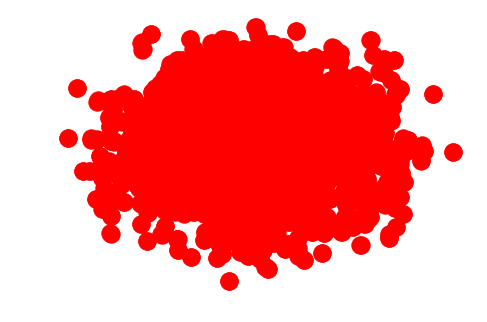

In [68]:
import matplotlib.pyplot as plt

G_Align=nx.Graph()
elist = unique_xmap
G_Align.add_weighted_edges_from(elist)
nx.draw(G_Align)
plt.show()

## compare node and edge connectivity
## compute largest connected component

In [57]:
print('Aligned graph have ',G_Align.number_of_nodes(),' nodes.')
print('Aligned graph have ',G_Align.number_of_edges(),' edges.')

Aligned graph have  13215  nodes.
Aligned graph have  107409  edges.


In [58]:
print('Target graph have ',G_target_na.number_of_nodes(),' nodes.')
print('Target graph have ',G_target_na.number_of_edges(), ' edges.')

Target graph have  13217  nodes.
Target graph have  107573  edges.


In [59]:
sum_weight=0
for i in range(len(unique_xmap)):
    sum_weight=sum_weight+ unique_xmap[i][2]
total_weight=0    
for i in range(len(nd1)):
    for j in range(len(nd2)):
        temp=G_target_na.get_edge_data(str(nd1[i]),str(nd2[j]))
        if(temp!=None):
            total_weight=total_weight+int(list(temp.values())[0])
print('Maximum Weight in Aligned graph: ',sum_weight) 
print('Total Weight in Target: ',total_weight)

Maximum Weight in Aligned graph:  11613156
Total Weight in Target:  11622614


In [60]:
# returns number of different connected components 
print('number of different connected components in Aligned graph: ',nx.number_connected_components(G_Align)) 
print('number of different connected components in Target graph: ',nx.number_connected_components(G_target_na))  

number of different connected components in Aligned graph:  1452
number of different connected components in Target graph:  1451


In [61]:
# returns list of nodes in different connected components 
cc_align=list(nx.connected_components(G_Align))
cc_target=list(nx.connected_components(G_target_na))
print(list(nx.connected_components(G_Align))) 
print(list(nx.connected_components(G_target_na)))

[{'hs524', 'dm3251', 'dm10207', 'hs2032', 'hs4518', 'hs11061', 'dm9026', 'hs18752', 'hs412', 'hs902', 'hs69', 'hs4337', 'dm5533', 'hs10736', 'hs11151', 'hs4668', 'dm674', 'hs4354', 'hs1443', 'hs701', 'hs9593', 'hs10430', 'hs8554', 'dm12012', 'hs3677', 'hs9164', 'hs6725', 'hs12109', 'dm1207', 'hs3552', 'hs5366', 'hs8471', 'dm218', 'dm8584', 'dm2319', 'hs10337', 'hs17498', 'hs1744', 'hs4106', 'hs17643', 'hs12366', 'hs1200', 'dm4801', 'hs12803', 'hs2375', 'hs7402', 'hs2122', 'dm3943', 'dm5224', 'dm8843', 'dm6180', 'dm146', 'hs1011', 'dm9971', 'hs4318', 'dm3916', 'hs265', 'hs5958', 'dm3570', 'hs2545', 'dm90', 'hs13446', 'dm967', 'hs9429', 'hs2244', 'dm9393', 'dm3582', 'hs1188', 'hs7299', 'hs3389', 'dm6009', 'dm5823', 'dm6673', 'hs507', 'dm427', 'hs20793', 'hs16060', 'dm9597', 'hs11919', 'dm2039', 'hs6289', 'dm1593', 'hs17605', 'hs10826', 'hs4214', 'dm1248', 'dm3752', 'hs15653', 'dm1898', 'hs1882', 'dm2281', 'dm5209', 'hs369', 'hs16458', 'dm6283', 'hs7540', 'hs2583', 'hs2322', 'hs3360', 'hs

In [62]:
# returns number of nodes to be removed 
# so that Graph becomes disconnected 
print(nx.node_connectivity(G_Align)) 
print(nx.node_connectivity(G_target_na))
# returns number of edges to be removed 
# so that Graph becomes disconnected 
print(nx.edge_connectivity(G_Align))
print(nx.edge_connectivity(G_target_na))

0
0
0
0


## check similarity of connected components

In [63]:
count=0
for i in range(len(cc_align)):
    for j in range(len(cc_target)):
        if(cc_align[i]==cc_target[j]):
            count=count+1
print(count)

1450


In [64]:
Gc = max(nx.connected_component_subgraphs(G_Align), key=len)
print('Largest common connected graph in Aligned graph: ',len(Gc))
Gct = max(nx.connected_component_subgraphs(G_target_na), key=len)
print('Largest common connected graph in Target graph: ',len(Gct))

Largest common connected graph in Aligned graph:  7787
Largest common connected graph in Target graph:  7791


### check for mistake align

In [55]:
for i in range(len(unique_xmap)):
    if (G_target_na.has_edge(unique_xmap[i][0], unique_xmap[i][1])==False):
        print(unique_xmap[i])
        print(i)
print('no exist error')    

no exist error


# draw graphs

In [0]:
nx.draw_networkx(G1, with_labels = True)

In [0]:
nx.draw_networkx(G2)

In [0]:
import matplotlib.pyplot as plt
nx.draw(G_target_na)
plt.show()

In [65]:
# total ec
total_ec=G_target_na.number_of_edges()/G1.number_of_edges()*100
ratio_ec=score_ec_temp/total_ec*100
print("total EC: ",total_ec)
print("ratio EC: ",ratio_ec)

total EC:  319.29298625745747
ratio EC:  99.84754538778319


In [66]:
# total ics
total_ics=G_target_na.number_of_edges()/count_induced*100
ratio_ics=score_ics_temp/total_ics*100
print("total ICS: ",total_ics)
print("ratio ICS: ",ratio_ics)

total ICS:  78.60535468973782
ratio ICS:  99.84754538778317


In [67]:
# total s3
total_s3=(G_target_na.number_of_edges()/(G1.number_of_edges()+count_induced-G_target_na.number_of_edges()))*100
ratio_s3=score_s3_temp/total_s3*100
print("total S3: ",total_s3)
print("ratio S3: ",ratio_s3)

total S3:  170.83214228997937
ratio S3:  99.58817646701787


# compute FC

In [1]:
import pickle
with open('dm-hs-weightGraph.pickle', 'rb') as f:
    unique_xmap = pickle.load(f)

In [2]:
tree=[[unique_xmap[i][0],unique_xmap[i][1]] for i in range(len(unique_xmap))]
tree

[['dm128', 'hs6266'],
 ['dm236', 'hs6351'],
 ['dm3529', 'hs14922'],
 ['dm1192', 'hs1646'],
 ['dm25', 'hs3344'],
 ['dm7746', 'hs12148'],
 ['dm7511', 'hs8021'],
 ['dm10407', 'hs15519'],
 ['dm714', 'hs4302'],
 ['dm119', 'hs425'],
 ['dm4970', 'hs4376'],
 ['dm9668', 'hs5076'],
 ['dm2998', 'hs195'],
 ['dm4262', 'hs2348'],
 ['dm1832', 'hs8450'],
 ['dm3220', 'hs463'],
 ['dm7464', 'hs7899'],
 ['dm4813', 'hs300'],
 ['dm117', 'hs7210'],
 ['dm6667', 'hs14085'],
 ['dm1861', 'hs7463'],
 ['dm3544', 'hs5760'],
 ['dm1167', 'hs1512'],
 ['dm10863', 'hs7455'],
 ['dm16', 'hs105'],
 ['dm1898', 'hs2817'],
 ['dm1286', 'hs7299'],
 ['dm504', 'hs3825'],
 ['dm4994', 'hs3764'],
 ['dm2669', 'hs452'],
 ['dm1767', 'hs1690'],
 ['dm1649', 'hs1684'],
 ['dm3581', 'hs3930'],
 ['dm8461', 'hs4106'],
 ['dm2996', 'hs2477'],
 ['dm4583', 'hs7186'],
 ['dm11821', 'hs19113'],
 ['dm7274', 'hs8935'],
 ['dm613', 'hs2320'],
 ['dm4823', 'hs9333'],
 ['dm3871', 'hs964'],
 ['dm8646', 'hs4193'],
 ['dm4334', 'hs5206'],
 ['dm4235', 'hs4143']

# load ontology and create DAG graph

In [3]:
import pandas as pd
f=open('go.dag.obo.txt').readlines()
df=pd.DataFrame(f)
df

,0
0,GO:0046431 GO:0019599\n
1,GO:0046430 GO:0019595\n
2,GO:0046432 GO:0019361\n
3,GO:0034198 GO:0060733\n
4,GO:0046343 GO:0019872\n
5,GO:0034193 GO:0034195\n
6,GO:0034192 GO:0034194\n
7,GO:0034190 GO:0034191\n
8,GO:0046437 GO:0030632 GO:0070179\n
9,GO:0046340 GO:0046342\n


In [4]:
# preprocessing
dag_list=[]
for i in range(len(df[0])):
    m1=str(df[0][i])
    m1=m1.replace('GO:','')
    m1=m1.replace('\n','')
    s=m1.split(' ')
    dag_list.append(s)
dag_list

[['0046431', '0019599'],
 ['0046430', '0019595'],
 ['0046432', '0019361'],
 ['0034198', '0060733'],
 ['0046343', '0019872'],
 ['0034193', '0034195'],
 ['0034192', '0034194'],
 ['0034190', '0034191'],
 ['0046437', '0030632', '0070179'],
 ['0046340', '0046342'],
 ['0030852', '0045658', '0030853', '0045643', '0030854', '0045640'],
 ['0030853', '0045659', '0045644', '0045641'],
 ['0030851', '0030221', '0030223', '0030222'],
 ['0030856',
  '0003339',
  '0030860',
  '0045601',
  '0030857',
  '0072182',
  '0030858',
  '0045616'],
 ['0030857', '0045602', '0030861', '0045617', '0072183'],
 ['0030854', '0045645', '0045642', '0045660'],
 ['0030855',
  '0030859',
  '0030216',
  '0072192',
  '0060671',
  '0072160',
  '0060742',
  '0035026',
  '0072311',
  '0060487',
  '0045446',
  '0060644',
  '0002065'],
 ['0030858', '0045603', '0030862', '0045618'],
 ['0030859', '0045198'],
 ['0031106', '0032186'],
 ['0031105', '0032151', '0032152'],
 ['0031103', '0014814', '0048673', '0014012'],
 ['0031102', '00

In [5]:
dag_nd=[]
for i in range(len(dag_list)):
    for j in range(len(dag_list[i])):
        dag_nd.append(dag_list[i][j])
dag_nodes=set(dag_nd)
print(dag_nodes)
print(len(dag_nodes))

{'0000423', '0071659', '0047124', '0005363', '0080003', '0003097', '0080069', '0007015', '0030214', '0034124', '0023021', '0060357', '0021809', '0022402', '0051026', '0010478', '0045922', '0050267', '0043479', '0043920', '0009240', '0060601', '0015578', '0044129', '0043008', '0004449', '0071120', '0047293', '0001764', '0050101', '0046876', '0044106', '0007137', '0018455', '0019091', '0002887', '0000835', '0010241', '0048146', '0032231', '0070868', '0033705', '0010417', '0015716', '0032540', '0060957', '0043753', '0050726', '0002513', '0030856', '0032174', '0015605', '0015496', '0007283', '0043014', '0060174', '0071592', '0009059', '0080025', '0034279', '0042722', '0046337', '0009036', '0060079', '0018312', '0010098', '0033261', '0071571', '0000433', '0045847', '0050902', '0055061', '0070809', '0048321', '0000312', '0000435', '0031497', '0044246', '0008838', '0050983', '0043136', '0031835', '0005859', '0033700', '0031748', '0019171', '0018549', '0005745', '0050486', '0021811', '0045379'

In [6]:
# create dag edges
dag_edges=[]
for i in range(len(dag_list)):
    for j in range(1,len(dag_list[i])):
        ed=[dag_list[i][0],dag_list[i][j]]
        dag_edges.append(ed)
dag_edges

[['0046431', '0019599'],
 ['0046430', '0019595'],
 ['0046432', '0019361'],
 ['0034198', '0060733'],
 ['0046343', '0019872'],
 ['0034193', '0034195'],
 ['0034192', '0034194'],
 ['0034190', '0034191'],
 ['0046437', '0030632'],
 ['0046437', '0070179'],
 ['0046340', '0046342'],
 ['0030852', '0045658'],
 ['0030852', '0030853'],
 ['0030852', '0045643'],
 ['0030852', '0030854'],
 ['0030852', '0045640'],
 ['0030853', '0045659'],
 ['0030853', '0045644'],
 ['0030853', '0045641'],
 ['0030851', '0030221'],
 ['0030851', '0030223'],
 ['0030851', '0030222'],
 ['0030856', '0003339'],
 ['0030856', '0030860'],
 ['0030856', '0045601'],
 ['0030856', '0030857'],
 ['0030856', '0072182'],
 ['0030856', '0030858'],
 ['0030856', '0045616'],
 ['0030857', '0045602'],
 ['0030857', '0030861'],
 ['0030857', '0045617'],
 ['0030857', '0072183'],
 ['0030854', '0045645'],
 ['0030854', '0045642'],
 ['0030854', '0045660'],
 ['0030855', '0030859'],
 ['0030855', '0030216'],
 ['0030855', '0072192'],
 ['0030855', '0060671'],


In [7]:
import networkx as nx
go=nx.DiGraph()
go.add_nodes_from(dag_nodes)
go.add_edges_from(dag_edges)
go

In [8]:
c=0
import numpy as np
na=tree
for i in range(len(tree)):
    for j in range(2):
        if ('hs' in tree[i][j] or 'dm' in tree[i][j]):
            s=tree[i][j][2:]
            x='0'*(7-len(s))
            y=x+s
            #print(y)
            na[i][j]=y
            c=c+1
print(len(tree),c)
print(len(na))

107412 214824
107412


In [9]:
fc=[]
for i in range(len(na)):
    if na[i][0] in dag_nodes:
        e=go.predecessors(na[i][0])
        if na[i][1] in dag_nodes: 
            f=go.predecessors(na[i][1])
            temp=[]
            for key in e:
                temp.append(key)
            for key in f:
                temp.append(key)
            # compute intersection/union 
            fc.append(sum([temp.count(temp[z])/len(temp) for z in range(len(temp))]))
        else:
            fc.append(0)
#print(fc)
# compute average of all fc 
func=np.average(fc)
print('functional coherence:',func)

functional coherence: 0.6116912099296136
